In [3]:
def naive(p, t):
    """Normal Naive exact matchng function returing occurances where the pattern p matches to Text t"""
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

def reverseComplement(s):
    """Returns the reverse complement of a given sequence"""
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

def readGenome(filename):
    """Rading a genome assembly file"""
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

def readFastq(filename):
    """ Reads a Fasta file"""
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities


def naive_with_rc(p, t):
    """Modified Naive exact matching algorithm returing occurrences of the P and its reverse complement in T."""
    occurrences = []
    pc= reverseComplement(p)
    if pc==p:
        for i in range(len(t) - len(p) + 1):  # loop over alignments
            match = True
            for j in range(len(p)):  # loop over characters
                if t[i+j] != p[j]:  # compare characters
                    match = False
                    break
            if match:
                occurrences.append(i)  # all chars matched; record
        return occurrences
    else :
        for i in range(len(t) - len(p) + 1):  # loop over alignments
            match = True
            for j in range(len(p)):  # loop over characters
                if t[i+j] != p[j]:  # compare characters
                    match = False
                    break
            if match:
                occurrences.append(i)  # all chars matched; record
        for i in range(len(t) - len(pc) + 1):
            match = True
            for j in range(len(pc)):
                if t[i+j] != pc[j]:
                    match = False
                    break
            if match:
                occurrences.append(i)
        return occurrences

def naive_2mm(p, t):
    #Modified Naive exact matching algorithm returing occurrences of the P in T allowing for 2 mismatches.
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        mm=0
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                mm+=1
            if mm >2:
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

def findGCByPos(reads): #argument is onlt the string of bases(seqs no quality)
    ''' Find the GC ratio at each position in the read '''
    # Keep track of the number of G/C bases and the total number of bases at each position
    gc = [0] * 100 #no. of G/C bases since we know the length of each read - 100 define the size
    totals = [0] * 100 # total number of bases at each position
    for read in reads:
        for i in range(len(read)):
            if read[i] == 'C' or read[i] == 'G':
                gc[i] += 1
            totals[i] += 1
    # Divide G/C counts by total counts to get the average at each position
    for i in range(len(gc)):
        if totals[i] > 0: # if totals is 0 it will give error so
            gc[i] /= float(totals[i])
    return gc

In [14]:
#Testing the Naive exacting matching considering reverse complements - 
p = 'CCC'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CCC' + ten_as + 'GGG' + ten_as
occurrences = naive_with_rc(p, t)
print("Occurances of patter",p,"and its reverse complement in",t,"are at positions:",occurrences) 

p = 'CGCG'
t = ten_as + 'CGCG' + ten_as + 'CGCG' + ten_as
occurrences = naive_with_rc(p, t)
print("Occurances of patter",p,"and its reverse complement in",t,"are at positions:",occurrences)

#To get the leftmost occurance of a pattern in a text and number of occurances
print("Offset of leftmost occurrence:", min(occurrences))
print("The total number of occurrences:",len(occurrences))

Occurances of patter CCC and its reverse complement in AAAAAAAAAACCCAAAAAAAAAAGGGAAAAAAAAAA are at positions: [10, 23]
Occurances of patter CGCG and its reverse complement in AAAAAAAAAACGCGAAAAAAAAAACGCGAAAAAAAAAA are at positions: [10, 24]
Offset of leftmost occurrence: 10
The total number of occurrences: 2


In [17]:
#Testing the Naive exacting matching allowing 2 mismatches: 
p = 'CTGT'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CTGT' + ten_as + 'CTTT' + ten_as + 'CGGG' + ten_as
occurrences = naive_2mm(p, t)
print("Occurances of patter",p," allowing upto 2 mismatches in",t,"are at positions:",occurrences)

Occurances of patter CTGT  allowing upto 2 mismatches in AAAAAAAAAACTGTAAAAAAAAAACTTTAAAAAAAAAACGGGAAAAAAAAAA are at positions: [10, 24, 38]


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  235k  100  235k    0     0  1138k      0 --:--:-- --:--:-- --:--:-- 1179k


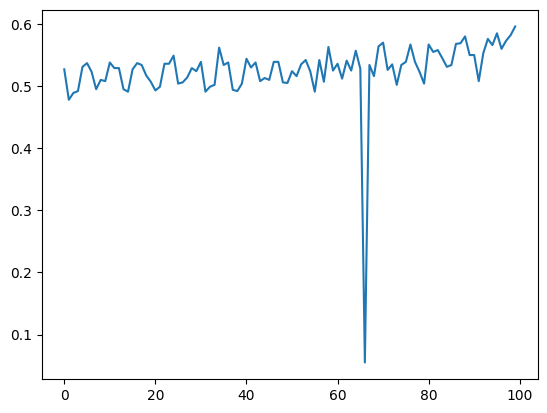

abnormal GC content observed in : [66] cycle


In [21]:
#Checking for low quality and where in the sequence it was observed - 
!curl -o ERR037900_1.first1000.fastq https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
seqs, quals = readFastq('ERR037900_1.first1000.fastq')

gc = findGCByPos(seqs)
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(gc)), gc)
plt.show()

#print(gc) average  GC concent in the graph is between 0.4 to 0.6 hence anything out of this has to be checked for:
indices = [i for i, val in enumerate(gc) if val < 0.4]
print('abnormal GC content observed in : %s cycle' % indices)